<a href="https://colab.research.google.com/github/GoryachevDaniil/DS_ML_Intro_stepik/blob/main/DS_ML_Intro_stepik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
import math as m

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [6]:
from IPython.display import HTML
style = "<style>svg{width:70% !important, hight:70% !important}</style>"
HTML(style)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
sns.set(rc={'figure.figsize' : (9, 6)})

In [9]:
students_performance = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/StudentsPerformance.csv', sep=',')

In [10]:
students_performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [13]:
students_performance.groupby('gender').aggregate({'writing score' : 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [14]:
students_performance.shape

(1000, 8)

In [15]:
students_performance.size

8000

In [16]:
students_performance.iloc[0:5, 0:]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
students_performance.iloc[[0, 4], [0, -1, -2, -3]]

,gender,writing score,reading score,math score
0,female,74,72,72
4,male,75,78,76


In [18]:
students_performance_with_name = students_performance.iloc[[0, 4 , 9]]

In [19]:
students_performance_with_name.index = ['Nastya', 'Vasya', 'Katya']

In [20]:
students_performance_with_name

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Nastya,female,group B,bachelor's degree,standard,none,72,72,74
Vasya,male,group C,some college,standard,none,76,78,75
Katya,female,group B,high school,free/reduced,none,38,60,50


In [21]:
students_performance_with_name.loc[['Vasya','Katya'], ['gender', 'writing score']]

,gender,writing score
Vasya,male,75
Katya,female,50


In [22]:
students_performance_with_name.iloc[:, 0] # pd.Series

Nastya    female
Vasya       male
Katya     female
Name: gender, dtype: object

In [23]:
my_series_1 = pd.Series([1, 2, 3], index=['Nastya', 'Vasya', 'Katya'])
my_series_2 = pd.Series([4, 5, 6], index=['Nastya', 'Vasya', 'Katya'])

In [24]:
pd.DataFrame({'col_name_1' : my_series_1, 'col_name_2' : my_series_2})

,col_name_1,col_name_2
Nastya,1,4
Vasya,2,5
Katya,3,6


In [25]:
students_performance_with_name['gender'] # pd.Series

Nastya    female
Vasya       male
Katya     female
Name: gender, dtype: object

In [26]:
students_performance_with_name[['gender']] # pd.DataFrame

,gender
Nastya,female
Vasya,male
Katya,female


In [27]:
titanic = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/titanic.csv', sep=',')

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.shape

(891, 12)

In [30]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
titanic.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [32]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
mean_writing_score = students_performance['writing score'].mean()

In [34]:
query = (students_performance['writing score'] > mean_writing_score) & (students_performance.gender == 'female')

In [35]:
students_performance.loc[students_performance['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [36]:
students_performance.loc[query]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [37]:
students_performance.loc[students_performance.gender == 'female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [38]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
# У какой доли студентов из датасэта в колонке lunch указано free/reduced?
len(students_performance.loc[students_performance['lunch'] == 'free/reduced']) / len(students_performance)

0.355

In [40]:
# Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?
students_performance['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [41]:
standart_lunch_query = students_performance['lunch'] == 'standard'
free_reduced_lunch_query = students_performance['lunch'] == 'free/reduced'

In [42]:
std_lunch_students = students_performance.loc[standart_lunch_query, ['math score', 'reading score', 'writing score']]
f_r_lunch_students = students_performance.loc[free_reduced_lunch_query, ['math score', 'reading score', 'writing score']]

In [43]:
print('std_lunch_students:')
print(f"Mean:\nMath: {std_lunch_students['math score'].mean()}\nReading: {std_lunch_students['reading score'].mean()}\nWriting: {std_lunch_students['writing score'].mean()}\n")
print(f"Std:\nMath: {std_lunch_students['math score'].std()}\nReading: {std_lunch_students['reading score'].std()}\nWriting: {std_lunch_students['writing score'].std()}\n")
print('f_r_lunch_students:')
print(f"Mean:\nMath: {f_r_lunch_students['math score'].mean()}\nReading: {f_r_lunch_students['reading score'].mean()}\nWriting: {f_r_lunch_students['writing score'].mean()}\n")
print(f"Std:\nMath: {f_r_lunch_students['math score'].std()}\nReading: {f_r_lunch_students['reading score'].std()}\nWriting: {f_r_lunch_students['writing score'].std()}\n")

std_lunch_students:
Mean:
Math: 70.03410852713178
Reading: 71.65426356589147
Writing: 70.8232558139535

Std:
Math: 13.653500996457035
Reading: 13.830602308284634
Writing: 14.339486981713934

f_r_lunch_students:
Mean:
Math: 58.92112676056338
Reading: 64.65352112676057
Writing: 63.02253521126761

Std:
Math: 15.159956131640516
Reading: 14.89533949584857
Writing: 15.43382261658457



In [44]:
students_performance = students_performance.rename(columns = {
                   'parental level of education' : 'parental_level_of_education',
                   'test preparation course' : 'test_preparation_course',
                   'math score' : 'math_score',	
                   'reading score' : 'reading_score',
                   'writing score' : 'writing_score'})

In [45]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
students_performance.query('math_score > 72 & gender == "female"').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
56,female,group E,associate's degree,standard,completed,82,85,86


In [47]:
wr_sc_qr = 78
students_performance.query('writing_score > @wr_sc_qr').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [48]:
score_cols = [i for i in list(students_performance) if 'score' in i] # не pandas way
score_cols

['math_score', 'reading_score', 'writing_score']

In [49]:
students_performance[score_cols].head() # не pandas way

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [50]:
students_performance.filter(like='score') # pandas way

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [51]:
students_performance_with_name.filter(like='s', axis=0) # pandas way

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Nastya,female,group B,bachelor's degree,standard,none,72,72,74
Vasya,male,group C,some college,standard,none,76,78,75


In [52]:
# Важной частью нашего курса будут задачи на программирование. Давайте попробуем решить первую задачу вместе.
# В переменной df  сохранен датафрэйм с произвольным числом колонок и строк. Отберите колонки, в которых есть '-' в датафрэйме df (вот соответствующий датасэт). Сохраните их в переменную selected_columns
# Если в условии задачи сообщается, что в некой переменной уже сохранен датафрэйм или другой объект, не нужно пересоздавать его самостоятельно, сразу начинайте работать с этой переменной.

In [53]:
df = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/column_hell.csv', sep=',')
df

,yrh&6,ohku,q,hfxx,umeca-4,apj,g,ijvnixxo,kudbpyw-3,upubjv,...,fi,clsruyy,g&6,qo$6,ap,o,sladymzr,tif,wuikzxt,wzuvc
0,0.288397,0.911359,0.488069,0.074599,0.016124,0.090555,0.560810,0.110975,0.430787,0.548763,...,0.793122,0.070335,0.145115,0.686579,0.071681,0.563068,0.815201,0.081902,0.333237,0.185148
1,0.861276,0.134987,0.701885,0.897921,0.507115,0.740151,0.963179,0.712024,0.671662,0.497596,...,0.477181,0.767931,0.996055,0.948774,0.054327,0.087341,0.072166,0.856081,0.120481,0.622113
2,0.775577,0.832874,0.862665,0.831049,0.003274,0.703112,0.509795,0.573296,0.286411,0.282792,...,0.421542,0.770413,0.749468,0.395022,0.307752,0.535575,0.341393,0.971201,0.714558,0.702453
3,0.857910,0.555818,0.598305,0.473988,0.784139,0.427963,0.725103,0.286610,0.863717,0.545562,...,0.240252,0.010355,0.759912,0.965837,0.110719,0.439488,0.816526,0.111621,0.373365,0.461615
4,0.748652,0.451725,0.252619,0.584361,0.011265,0.051115,0.755444,0.627191,0.206172,0.955043,...,0.846165,0.043458,0.209347,0.028276,0.700446,0.203503,0.181903,0.428842,0.099398,0.175227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.665300,0.744322,0.377087,0.809735,0.220817,0.248306,0.131914,0.217087,0.434444,0.852261,...,0.469934,0.940416,0.012272,0.519183,0.231462,0.778445,0.979528,0.742654,0.070859,0.595118
96,0.344394,0.182979,0.590196,0.483025,0.474131,0.031048,0.672095,0.573249,0.176011,0.847096,...,0.954133,0.073519,0.708749,0.942929,0.050652,0.902627,0.478454,0.895962,0.254965,0.963576
97,0.694568,0.507591,0.328004,0.333993,0.091637,0.356788,0.541017,0.040395,0.871606,0.680075,...,0.300616,0.172525,0.984465,0.645257,0.184107,0.322045,0.011599,0.197995,0.841725,0.695915
98,0.692840,0.220333,0.729843,0.202430,0.360106,0.980271,0.913669,0.549889,0.172385,0.049770,...,0.188240,0.053409,0.928515,0.135282,0.352835,0.046042,0.667842,0.633934,0.547764,0.232205


In [54]:
selected_columns = df.filter(like='-')
selected_columns

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836
...,...,...,...,...,...,...
95,0.220817,0.434444,0.601738,0.146333,0.918888,0.216499
96,0.474131,0.176011,0.359793,0.104707,0.257690,0.066934
97,0.091637,0.871606,0.121075,0.907699,0.313184,0.788592
98,0.360106,0.172385,0.015285,0.019571,0.060751,0.403166


In [55]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
students_performance.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [57]:
students_performance.groupby('gender', as_index=False) \
        .aggregate({'math_score' : 'mean', 'reading_score' : 'mean', 'writing_score' : 'mean'}) \
        .rename(columns={'math_score' : 'mean_math_score', 'reading_score' : 'mean_reading_score', 'writing_score' : 'mean_writing_score'})

,gender,mean_math_score,mean_reading_score,mean_writing_score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [58]:
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']) \
        .aggregate({'math_score' : 'mean', 'reading_score' : 'mean', 'writing_score' : 'mean'}) \
        .rename(columns={'math_score' : 'mean_math_score', 'reading_score' : 'mean_reading_score', 'writing_score' : 'mean_writing_score'})
mean_scores

mean_math_score  mean_reading_score  mean_writing_score
gender race/ethnicity                                                         
female group A               58.527778           69.000000           67.861111
       group B               61.403846           71.076923           70.048077
       group C               62.033333           71.944444           71.777778
       group D               65.248062           74.046512           75.023256
       group E               70.811594           75.840580           75.536232
male   group A               63.735849           61.735849           59.150943
       group B               65.930233           62.848837           60.220930
       group C               67.611511           65.424460           62.712230
       group D               69.413534           66.135338           65.413534
       group E               76.746479           70.295775           67.394366

In [59]:
mean_scores.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [60]:
mean_scores.loc[[('female', 'group A'), ('female', 'group B')]]

mean_math_score  mean_reading_score  mean_writing_score
gender race/ethnicity                                                         
female group A               58.527778           69.000000           67.861111
       group B               61.403846           71.076923           70.048077

In [61]:
students_performance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [62]:
students_performance.sort_values(['gender', 'math_score']).groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33
91,male,group C,high school,free/reduced,none,27,34,36
327,male,group A,some college,free/reduced,none,28,23,19
76,male,group E,some high school,standard,none,30,26,22
596,male,group B,high school,free/reduced,none,30,24,15
211,male,group C,some college,free/reduced,none,35,28,27


In [63]:
students_performance['total_score'] = students_performance.math_score + students_performance.reading_score + students_performance.writing_score
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [64]:
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))
students_performance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [65]:
students_performance.drop(['total_score', 'lunch'], axis=1)

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


In [66]:
dota_hero_stats = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/dota_hero_stats.csv', sep=',')
dota_hero_stats.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [67]:
dota_hero_stats.groupby(['legs']).count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [68]:
accountancy = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/accountancy.csv', sep=',')
accountancy.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [69]:
accountancy.groupby(['Executor', 'Type']).aggregate({'Salary' : 'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [70]:
dota_hero_stats.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [71]:
dota_hero_stats.groupby(['attack_type', 'primary_attr']).attack_type.value_counts()

attack_type  primary_attr  attack_type
Melee        agi           Melee          19
             int           Melee           2
             str           Melee          35
Ranged       agi           Ranged         18
             int           Ranged         40
             str           Ranged          3
Name: attack_type, dtype: int64

In [72]:
concentrations = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/algae.csv', sep=',')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [73]:
mean_concentrations = concentrations.groupby(['genus']).mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [74]:
tmp = concentrations[concentrations['genus'] == 'Fucus']
print(f"{round(tmp['alanin'].min(), 2)} {round(tmp['alanin'].mean(), 2)} {round(tmp['alanin'].max(), 2)}")

0.35 3.57 6.64


In [75]:
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [76]:
concentrations.groupby(['group']).count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [77]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


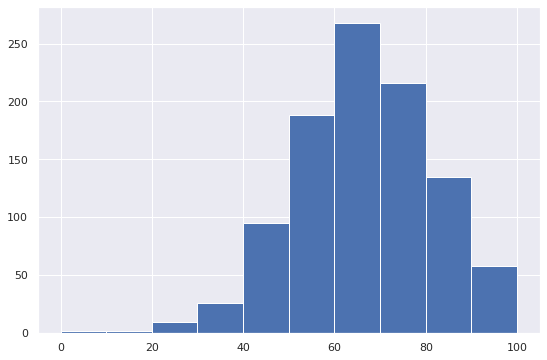

In [78]:
students_performance.math_score.hist()

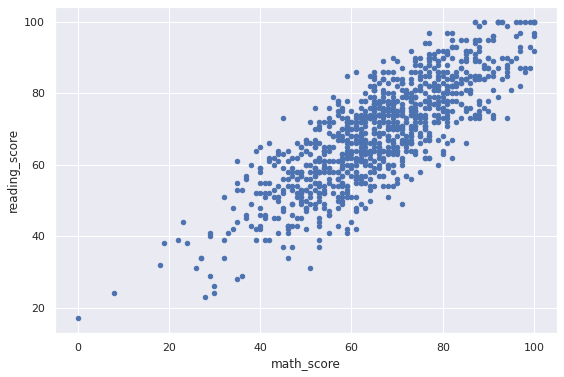

In [79]:
students_performance.plot.scatter(x='math_score', y='reading_score')

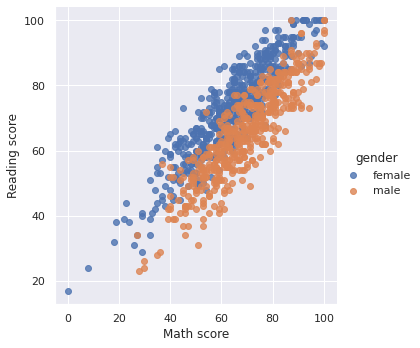

In [80]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [81]:
print(sns.__version__)

0.11.2


In [82]:
income = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/income.csv', sep=',')

In [83]:
income

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


In [84]:
income['date'] = income.index

In [85]:
income

,income,date
2018-11-30,20,2018-11-30
2018-12-31,60,2018-12-31
2019-01-31,180,2019-01-31
2019-02-28,380,2019-02-28
2019-03-31,660,2019-03-31


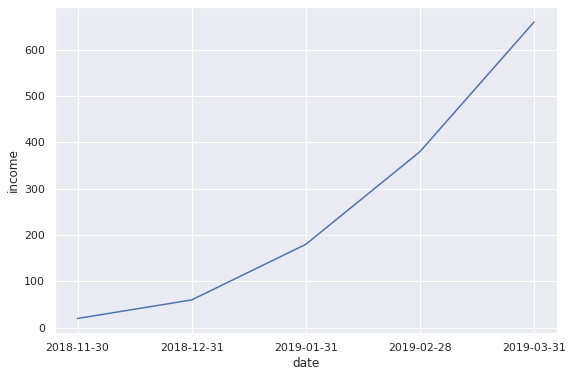

In [86]:
ax = sns.lineplot(x="date", y=income.income, data=income)

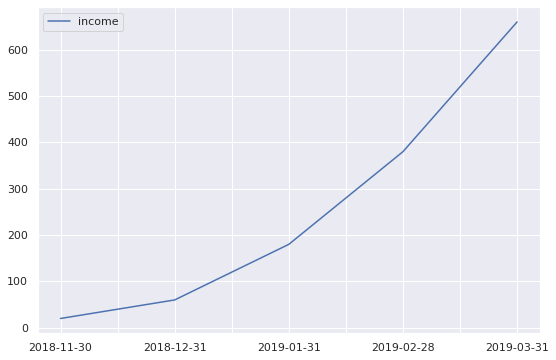

In [87]:
income.plot()

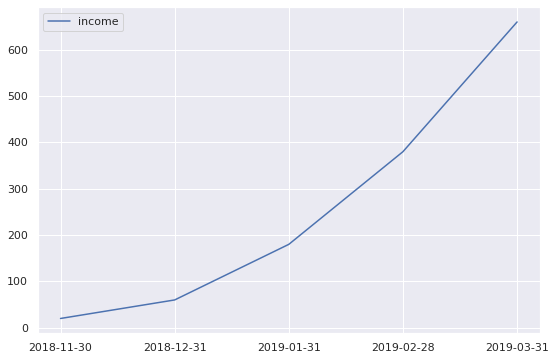

In [88]:
ax = sns.lineplot(data=income)

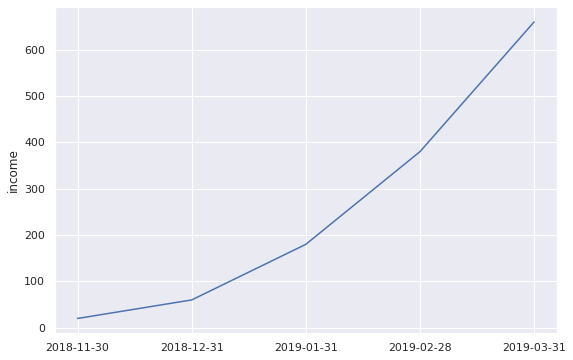

In [89]:
sns.lineplot(x=income.index, y=income.income)

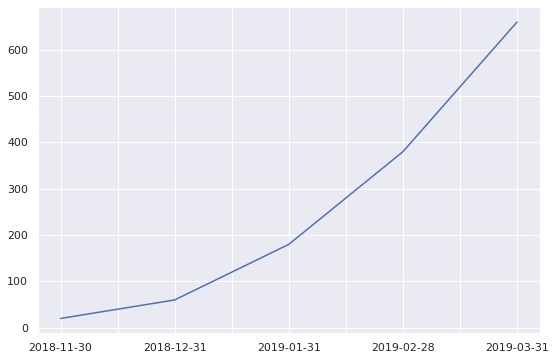

In [90]:
income.income.plot()

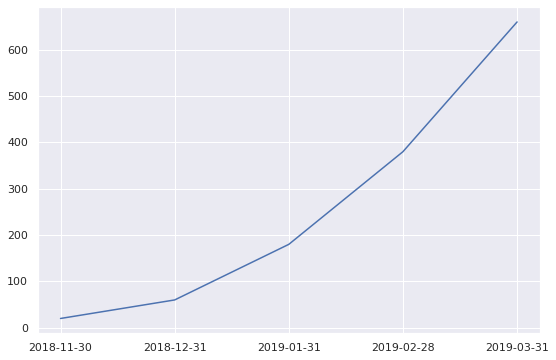

In [91]:
plt.plot(income.index, income.income)

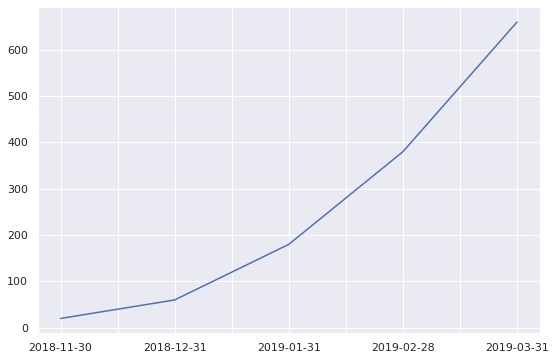

In [92]:
income['income'].plot()

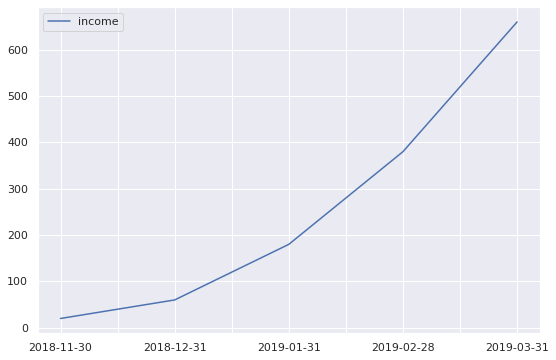

In [93]:
income.plot(kind='line')

In [94]:
df = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/dataset_209770_6.txt', sep=' ')

In [95]:
df.head()

,x,y
0,1075.613791,1304.550396
1,102.601296,98.200399
2,610.314209,304.385681
3,192.511216,705.047008
4,1492.620431,1086.579472


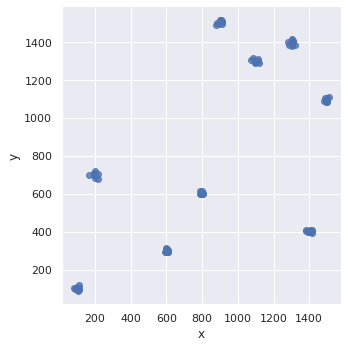

In [96]:
sns.lmplot(x='x', y='y', data=df, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


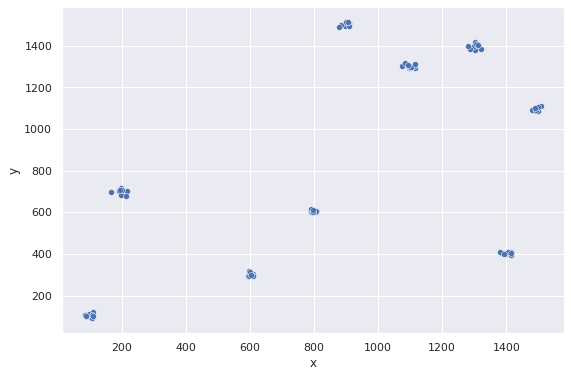

In [97]:
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1])

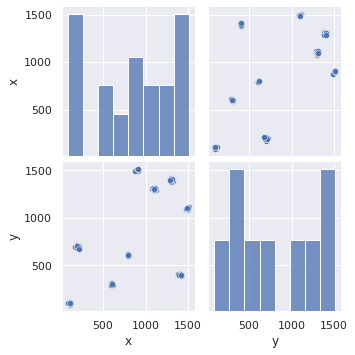

In [98]:
sns.pairplot(df)

In [99]:
genome_matrix = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/genome_matrix.csv', sep=',')

In [100]:
genome_matrix.head()

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


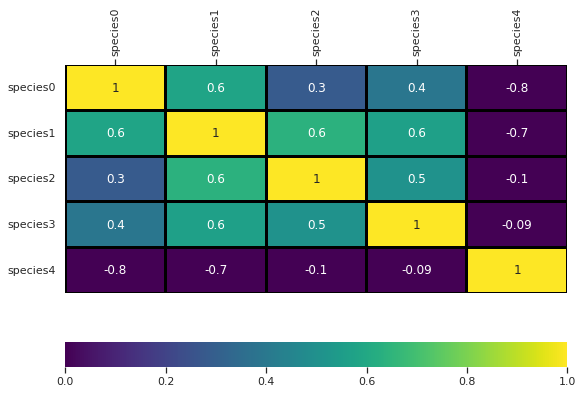

In [101]:
g = sns.heatmap(genome_matrix.corr(), cmap="viridis", annot = True, fmt='.1g', \
                vmin=0, vmax=1, center=0.5, linewidths=2, linecolor='black', cbar_kws= {'orientation': 'horizontal'}, square=False)
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

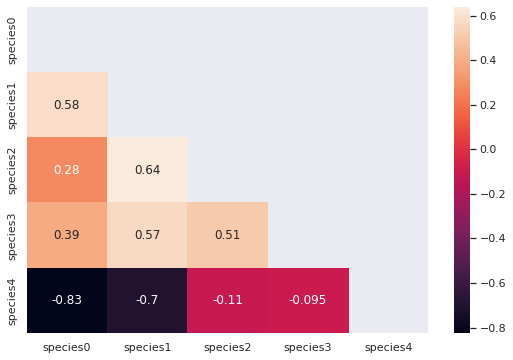

In [102]:
matrix = np.triu(genome_matrix.corr())
sns.heatmap(genome_matrix.corr(), annot=True, mask=matrix)

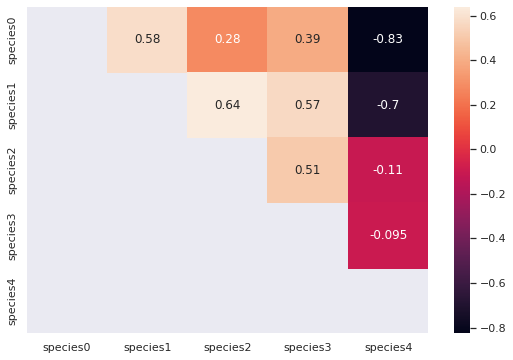

In [103]:
matrix = np.tril(genome_matrix.corr())
sns.heatmap(genome_matrix.corr(), annot=True, mask=matrix)

In [104]:
dota_hero_stats_2 = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/dota_hero_stats_2.csv', sep=',')

In [105]:
dota_hero_stats_2

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


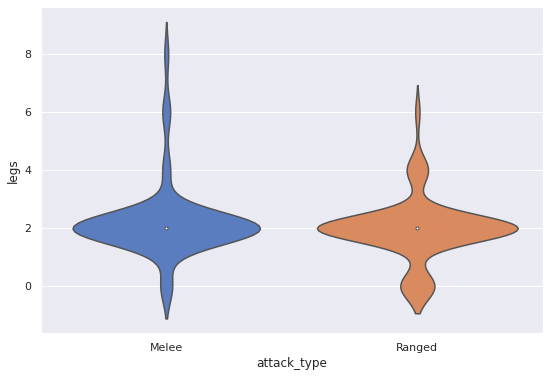

In [106]:
ax = sns.violinplot(x="attack_type", y="legs", data=dota_hero_stats_2, palette="muted")

In [107]:
dotaRoles = dota_hero_stats_2['roles']
tmp_lst = []
for i in range(len(dotaRoles)):
  tmp_lst.append(len(dotaRoles[i].split(',')))
dota_hero_stats_2['cnt'] = tmp_lst
dota_hero_stats_2['cnt'].mode()

0    4
dtype: int64

In [108]:
iris = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/iris.csv', sep=',')

In [109]:
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [110]:
iris.drop(['Unnamed: 0'], axis=1, inplace=True)
iris.drop(['species'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

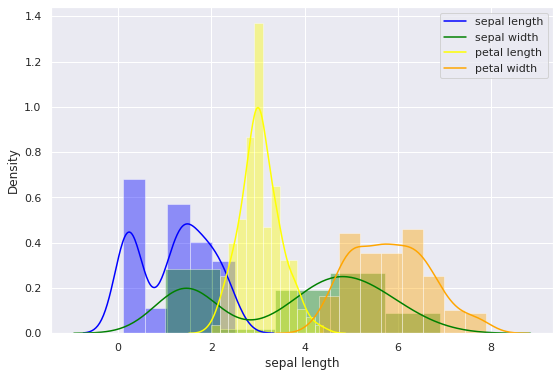

In [111]:
sns.distplot(iris['petal width'], color = "blue")
sns.distplot(iris['petal length'], color ="green")
sns.distplot(iris['sepal width'], color = "yellow")
sns.distplot(iris['sepal length'], color = "orange")
plt.legend(iris.iloc[:, 0:].columns)

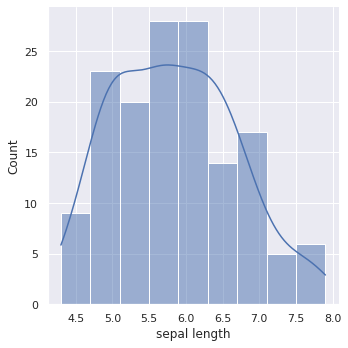

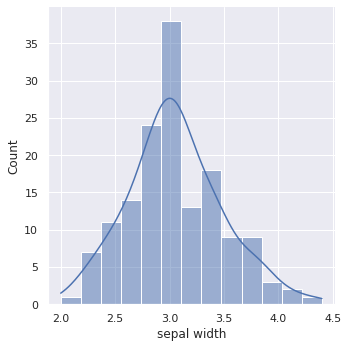

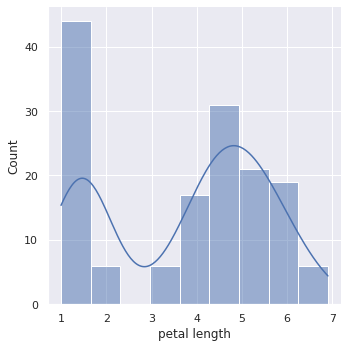

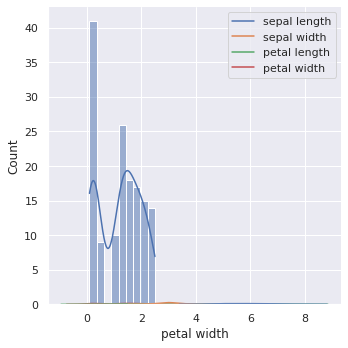

In [112]:
for column in iris:
  sns.displot(iris, x=column, kde=True)
sns.kdeplot(data=iris)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

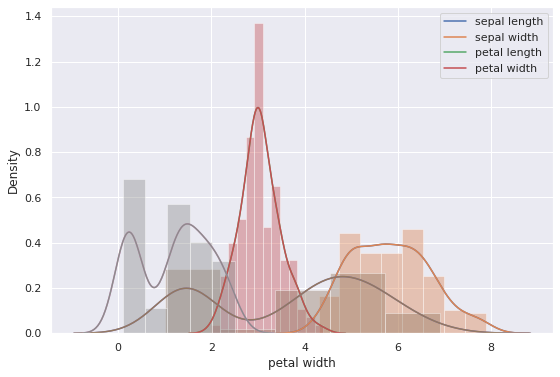

In [113]:
for column in iris: 
  sns.kdeplot(iris[column])
  sns.distplot(iris[column])
  plt.legend(iris.iloc[:, 0:].columns)

In [114]:
name = 'petal length'
print(iris[name].max() - iris[name].min())

5.9


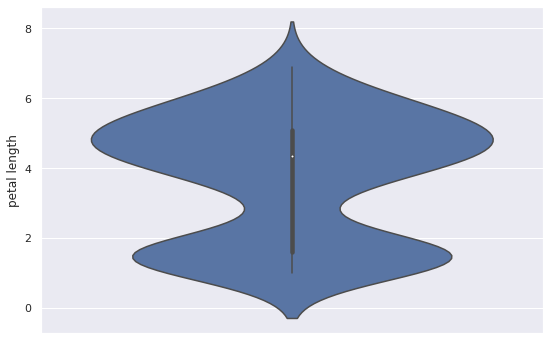

In [115]:
# sns.set_theme(style="whitegrid")
ax = sns.violinplot(y=iris["petal length"])

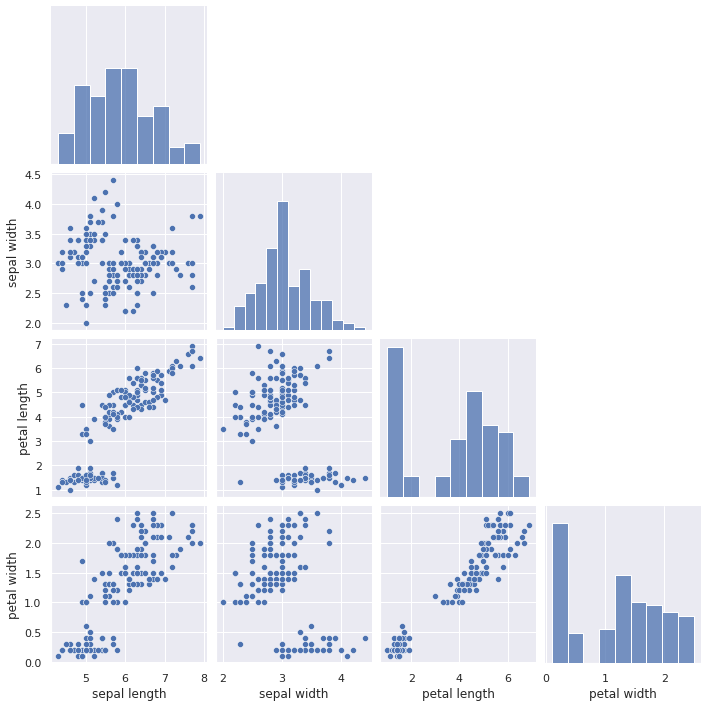

In [116]:
sns.pairplot(iris, corner=True)

In [117]:
# Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами 
# (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:

In [118]:
my_data = pd.DataFrame(data={'type' : ['A', 'A', 'B', 'B'], 'value' : [10, 14, 12, 23]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [119]:
my_stat = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/my_stat.csv', sep=',')

In [120]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [121]:
my_stat.iloc[0:2]

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0


In [122]:
# В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
# В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [123]:
subset_1 = my_stat.loc[0:9, ['V1', 'V3']]
subset_1.head()

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B


In [124]:
p1 = my_stat.loc[1:3, ['V2', 'V4']]
p2 = my_stat.loc[5:, ['V2', 'V4']]

In [125]:
subset_2 = pd.concat([p1,p2])

In [126]:
subset_2.head()

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0


In [127]:
# В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.
# В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

In [128]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_1.head()

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0


In [129]:
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
subset_2.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0


In [130]:
# Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:
# V5 = V1 + V4
# V6 = натуральный логарифм переменной V2

In [131]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat.head()

,V1,V2,V3,V4,V5
0,2,13.0,B,1.0,3.0
1,-1,7.0,B,1.0,0.0
2,0,11.0,A,0.0,0.0
3,2,11.0,A,2.0,4.0
4,0,10.0,B,-1.0,-1.0


In [132]:
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [133]:
# Отличная работа, закрепим еще пару важных вопросов и можно двигаться дальше.
# Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.
# Переименуйте колонки в данных  my_stat следующим образом:
# V1 -> session_value
# V2 -> group
# V3 -> time
# V4 -> n_users

In [134]:
my_stat.rename(columns = {'V1' : 'session_value', 'V2' : 'group', 'V3' : 'time', 'V4' : 'n_users'}, inplace = True)
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [135]:
# И напоследок давайте разберемся, как заменять наблюдения в данных.
# В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  
# В переменной session_value замените все пропущенные значения на нули.
# В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).
# Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

In [136]:
my_stat_1 = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/my_stat_1.csv', sep=',')
my_stat_1.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [137]:
my_stat_1['session_value'].fillna(0, inplace=True)
my_stat_1.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [138]:
my_stat_1['n_users'][my_stat_1['n_users'] > 0].median()

5.0

In [139]:
my_stat_1['n_users'][my_stat_1['n_users'] < 0] = my_stat_1['n_users'][my_stat_1['n_users'] > 0].median()
my_stat_1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [140]:
my_stat['session_value'].fillna(0, inplace=True)
my_stat['n_users'][my_stat['n_users'] < 0] = my_stat['n_users'][my_stat['n_users'] > 0].median()
my_stat.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,1.0,-1.0,2.302585


In [141]:
# Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  groupby + некоторое преобразование. Например:

# число наблюдений в каждой группе
# df.groupby('group_var').count()

# Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:

# df.groupby(['group_var_1', 'group_var_2']).count()
# Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку по groupby, чтобы разобраться со 
# всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить 
# функцию только к нужной колонке в данных, можно использовать связку  groupby() + agg()

# my_stat.groupby('group').agg({'n_users': 'count'})
# В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), 
# в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

# Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [142]:
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,1.0,-1.0,2.302585


In [143]:
mean_session_value_data = my_stat.groupby(['group'], as_index=False).agg({'session_value': 'mean'}).rename(columns={"session_value": "mean_session_value"})
mean_session_value_data

,group,mean_session_value
0,5.0,0.000000
1,7.0,0.333333
2,8.0,0.633333
3,9.0,0.238938
4,10.0,0.065990
5,11.0,-0.081081
6,12.0,-0.078947
7,13.0,0.000000


In [144]:
# Практическим проектом нашего курса будет анализ активности студентов онлайн курса Введение в анализ данных в R, спасибо команде stepik, что предоставили анонимизированные данные.
# В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах раскажу во втором модуле!
# Описание данных:

# events_train.csv - данные о действиях, которые совершают студенты со стэпами

# step_id - id стэпа
# user_id - анонимизированный id юзера
# timestamp - время наступления события в формате unix date
# action - событие, возможные значения: 
# discovered - пользователь перешел на стэп
# viewed - просмотр шага,
# started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
# passed - удачное решение практического шага


# submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

# step_id - id стэпа
# timestamp - время отправки решения в формате unix date
# submission_status - статус решения
# user_id - анонимизированный id юзера

In [145]:
event_data_train = pd.read_csv('/content/gdrive/MyDrive/DS_ML_Intro_stepik/event_data_train.csv', sep=',')

In [146]:
event_data_train.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [147]:
event_data_train.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [148]:
event_data_train['date'] = pd.to_datetime(event_data_train.timestamp, unit='s')

In [149]:
event_data_train.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [150]:
event_data_train.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [151]:
print(f"min: {event_data_train['date'].min()}")
print(f"max: {event_data_train['date'].max()}")

min: 2015-06-15 04:00:48
max: 2018-05-19 23:33:31


In [152]:
event_data_train['day'] = event_data_train.date.dt.date

In [153]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


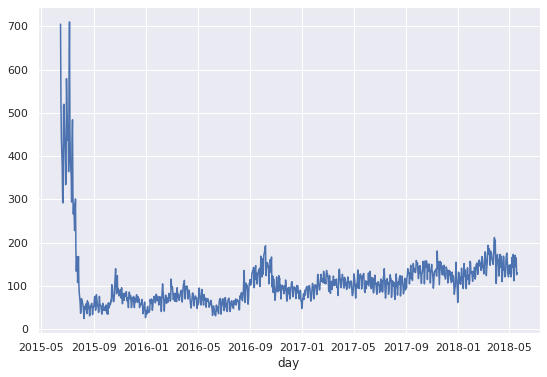

In [154]:
event_data_train.groupby(['day']).user_id.nunique().plot()

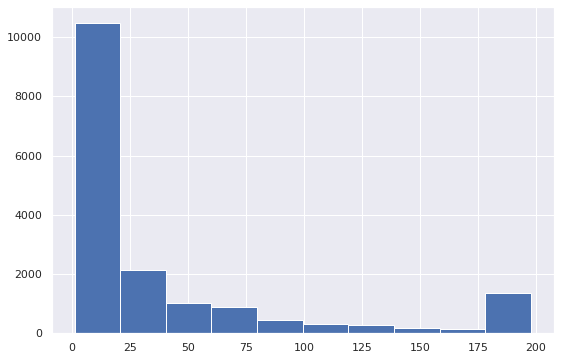

In [155]:
# incorrect 
event_data_train[event_data_train['action'] == 'passed'] \
                      .groupby('user_id', as_index=False) \
                      .agg({'step_id' : 'count'}) \
                      .rename(columns={'step_id' : 'passed_steps'}).passed_steps.hist()

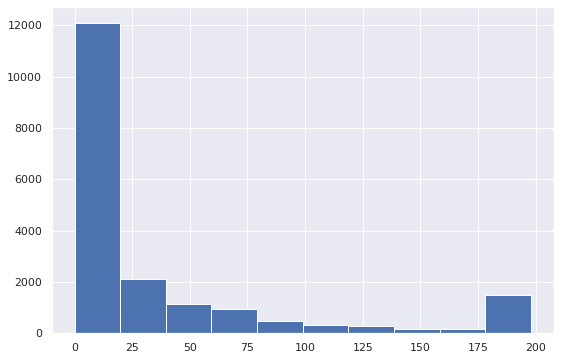

In [156]:
event_data_train.pivot_table(index='user_id', \
                             columns='action', \
                             values='step_id', \
                             aggfunc='count', \
                             fill_value=0).reset_index().discovered.hist()

In [157]:
submissions_data_train = pd.read_csv('/content/gdrive/MyDrive/DS_ML_Intro_stepik/submissions_data_train.csv', sep=',')

In [158]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [159]:
submissions_data_train['date'] = pd.to_datetime(submissions_data_train.timestamp, unit='s')
submissions_data_train['day'] = submissions_data_train.date.dt.date

In [160]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [161]:
user_events = event_data_train.pivot_table(index='user_id', \
                             columns='action', \
                             values='step_id', \
                             aggfunc='count', \
                             fill_value=0). reset_index()

In [162]:
user_scores = submissions_data_train.pivot_table(index='user_id', \
                             columns='submission_status', \
                             values='step_id', \
                             aggfunc='count', \
                             fill_value=0). reset_index()

In [163]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [164]:
gap_data = pd.Series(np.concatenate(event_data_train[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
                                                    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values))
gap_data = gap_data / (24 *60 * 60)

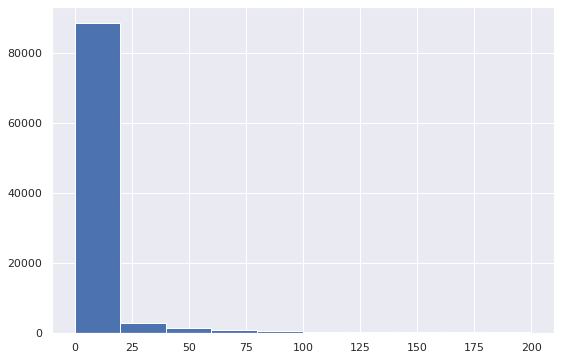

In [165]:
gap_data[gap_data < 200].hist()

In [166]:
gap_data.quantile(0.90)

18.325995370370403

In [167]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

In [168]:
user_scores.sort_values(by='correct', ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


In [169]:
users_data = event_data_train.groupby('user_id', as_index=False).agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [170]:
now = event_data_train['timestamp'].max()
drop_out_threshold = 30 * 24 * 60 * 60

In [171]:
users_data['leave'] =  (now - users_data.last_timestamp) > drop_out_threshold

In [172]:
users_data = users_data.merge(user_scores, on='user_id', how='outer')

In [173]:
users_data = users_data.fillna(0)

In [174]:
users_data = users_data.merge(user_events, on='user_id', how='outer')

In [175]:
user_days = event_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [176]:
user_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [177]:
users_data = users_data.merge(user_days, on='user_id', how='outer')

In [178]:
users_data

,user_id,last_timestamp,leave,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [179]:
users_data.user_id.nunique() == event_data_train.user_id.nunique()

True

In [180]:
users_data['Pass_course'] = users_data['passed'] > 170

In [181]:
100 * 1425 / 17809

8.001572238755685

## Part 2

In [182]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [183]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [184]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [185]:
clf

DecisionTreeClassifier(criterion='entropy')

In [186]:
X = data[['X_1', 'X_2']]
y = data.Y

In [187]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

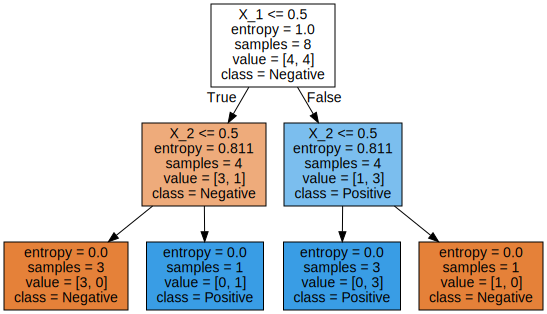

In [188]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [189]:
dogs = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/dogs.csv', sep=',')
dogs.head(10)

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


In [190]:
cats = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/cats.csv', sep=',')
cats.head(10)

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [191]:
import math as m

In [192]:
E_sh_sob= 0 - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))

E_gav_sob=0
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))

E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

In [193]:
print(f'{E_sh_sob}\n{E_sh_kot}\n{E_gav_sob}\n{E_gav_kot}\n{E_laz_sob}\n{E_laz_kot}')

0
0.9910760598382222
0
0.7219280948873623
0.0
-0.0


In [194]:
# IG
ig_1 = 0.97 - (1/10*E_sh_sob + 9/10*E_sh_kot)
ig_2 =  0.97 - (5/10*E_gav_sob + 5/10*E_gav_kot)
ig_3 = 0.97 - (4/10*E_laz_sob + 6/10*E_laz_kot)

In [195]:
print(f'{ig_1}\n{ig_2}\n{ig_3}')

0.07803154614559993
0.6090359525563188
0.97


In [196]:
titanic_data = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/titanic/train.csv', sep=',')

In [197]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [199]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [200]:
X = pd.get_dummies(X)

In [201]:
X = X.fillna({'Age' : X.Age.median()}) # diff for male/female

In [202]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [203]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [204]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [205]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

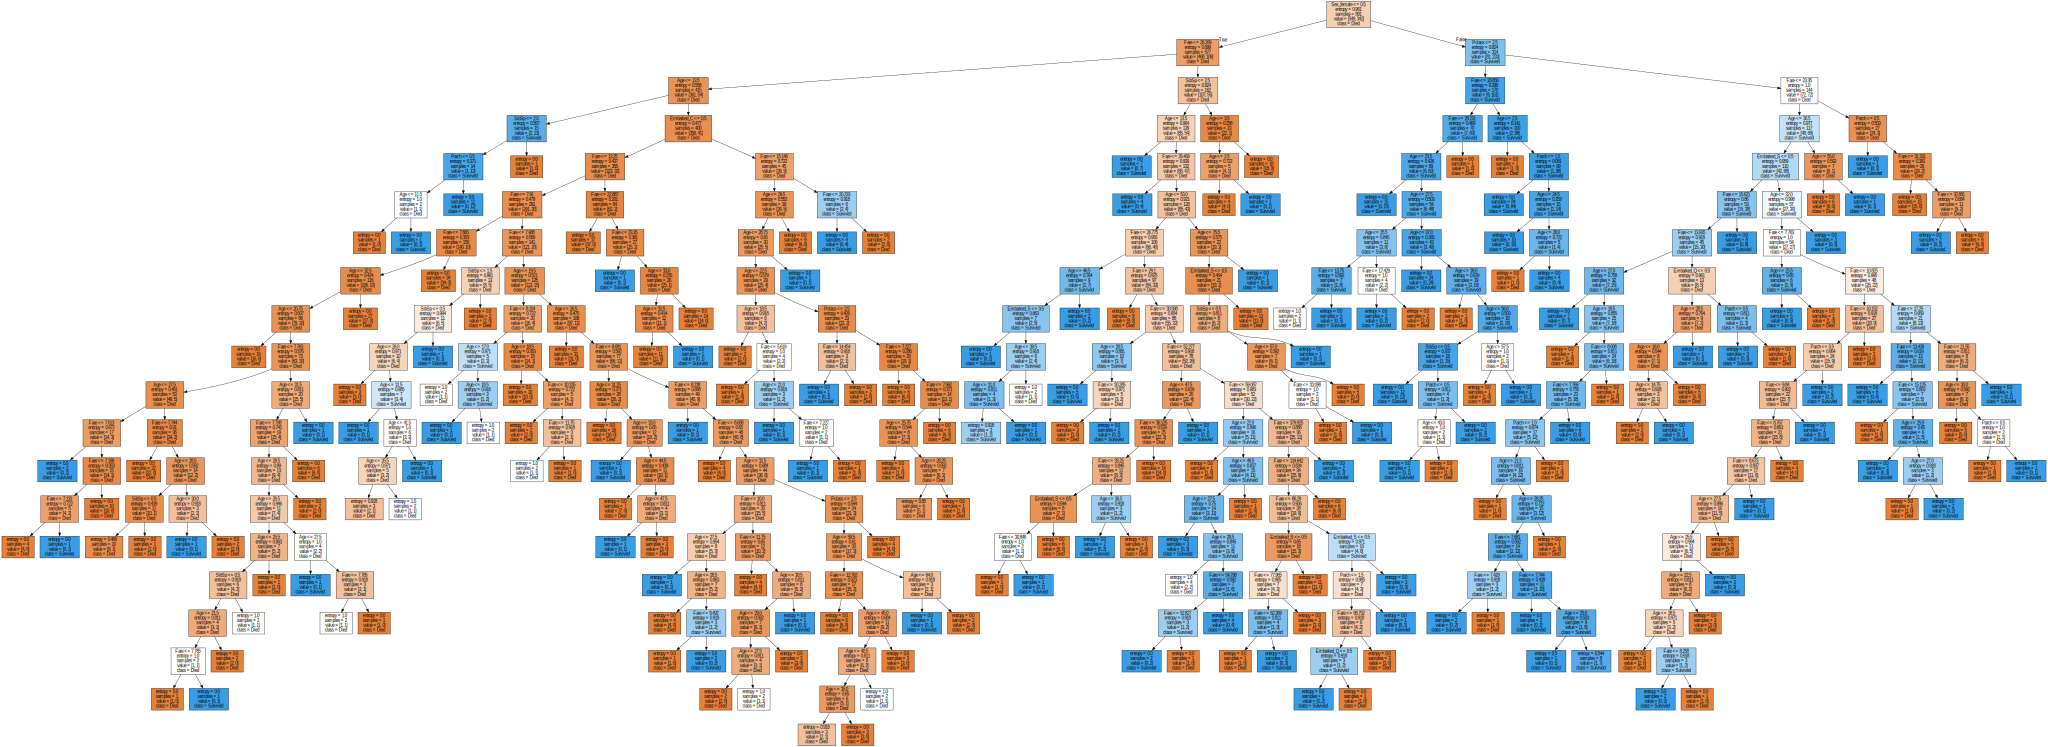

In [206]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [208]:
clf.score(X, y)

0.9797979797979798

In [209]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [210]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9798657718120806, 0.7830508474576271)

In [211]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [212]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [213]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8238255033557047, 0.8203389830508474)

In [214]:
max_depth_values = range(1, 100)

In [215]:
scores_data = pd.DataFrame()

In [216]:
for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  tmp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
  scores_data = scores_data.append(tmp_score_data)

In [217]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [218]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                                          var_name='set_type', value_name='score')

In [219]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


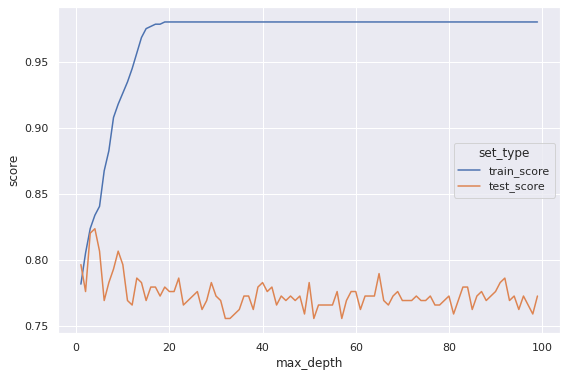

In [220]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [228]:
scores_data = pd.DataFrame()

In [229]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [230]:
cross_val_score(clf, X_train, y_train, cv=4).mean()

0.7869127516778522

In [231]:
for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  
  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=4).mean()

  tmp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score], 'mean_cross_val_score' : mean_cross_val_score})
  scores_data = scores_data.append(tmp_score_data)

In [232]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'mean_cross_val_score'],
                                          var_name='set_type', value_name='score')

In [233]:
scores_data_long.query("set_type == 'mean_cross_val_score'").head()

,max_depth,set_type,score
198,1,mean_cross_val_score,0.781879
199,2,mean_cross_val_score,0.795302
200,3,mean_cross_val_score,0.808725
201,4,mean_cross_val_score,0.786913
202,5,mean_cross_val_score,0.805369


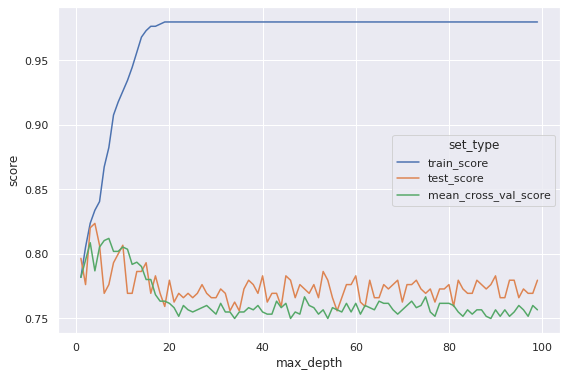

In [234]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)
или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [236]:
train_iris = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/train_iris.csv', sep=',')
test_iris = pd.read_csv('/content/gdrive/My Drive/DS_ML_Intro_stepik/test_iris.csv', sep=',')